# Introduction to Markov Chains
Jon Messier \
Last update: 12 August 2023\

---
<u>Resources:</u>
[Markov Chain Applications in Data Science](https://www.mysense.ai/2021/07/14/markov-chain-applications-in-data-science/) - Nice descriptive overview.

[wiki](https://en.wikipedia.org/wiki/Markov_chain) 

[MIT OpenCourseware - "Finite-state Markov Chains; The Matrix Approach" by Shan-Yuan Ho](https://ocw.mit.edu/courses/6-262-discrete-stochastic-processes-spring-2011/resources/lecture-7-finite-state-markov-chains-the-matrix-approach/) - Introduction to probability analysis for Markov Chains

[MIT OpenCourseware - "Markov Eigenvalues and Eigenvectors" by Prof. Robert Gallager](https://ocw.mit.edu/courses/6-262-discrete-stochastic-processes-spring-2011/resources/lecture-8-markov-eigenvalues-and-eigenvectors/) - Exploration of steady states

----
## Introduction
The defining characteristic of a Markov chain is that no matter how the process arrived at its present state, the possible future states are fixed. In other words, the probability of transitioning to any particular state is dependent solely on the current state and time elapsed. The state space, or set of all possible states, can be anything: letters, numbers, weather conditions, health conditions or stock performances.

A Markov chain is a stochastic model describing a sequence of states and the probability of transitioning from one state to another.   Markov chains have no history and only rely on the current state and the probability to move to another state.  Markov chains can be discrete in space or in time over continuous spaces.  
 - Discrete time & Discrete Space - Markov Chain
 - Discrete time & Continous space - [Harris Chain](https://en.wikipedia.org/wiki/Harris_chain)
 - Continous time & Discrete Sapce - Markov jump process
 - Continous time & Continous Space - [Weiner process](https://en.wikipedia.org/wiki/Wiener_process)

For this discussion we are are going to be ignoring time and dealing only with states.  This is a Discrete Time/Space version.  As an example, consider the price of an asset that only changes once per day.  The price (state) is discrete each day.  

---
## Example: Epedmiological Model (text and graphic from Mysense.ai)
The Markov Chains are usually called in the epidemiological and in the chemistry literature “compartmental models”. The most famous is the SIR model for infectious diseases.

The main idea is that individuals can be classified into three states: Susceptible (people that can get the disease), Infected (people that have the disease and are contagious), and Removed.

The main idea is that almost all individuals start Susceptible they can catch the disease with a handful of Infected.

Considering the discrete-time, such as days, some infected individuals will either get better or die, hence becoming Removed, and some Susceptible will become Infected.

The interesting part is how interactions between the compartments give rise to different models. Also, there are a lot of infectious disease models that use this idea and add additional compartments. For example, you can divide the infected into symptomatic and asymptomatic, you can divide the susceptible into vaccinated and unvaccinated, removed can be divided into recovered or death. A more complete description of these models can be found in Mathematical Epidemiology by Brauer.

[png]()

$P=1$

## Basic Math functions and definitions
**Finite state space**

If the state space is finite, the transition probability distribution can be represented by a matrix, called the transition matrix, with the (i, j)th element of $P$ equal to
    $$p_(ij)=P(X_(n + 1) = j | X_n=i)$$

Since each row of $P$ sums to one and all elements are non-negative, $P$ is a right stochastic matrix. 

**Stationary distribution relation to eigenvectors and simplices** \
A stationary distribution $\pi$ is a (row) vector, whose entries are non-negative and sum to 1, is unchanged by the operation of transition matrix $P$ on it and so is defined by:
$$\pi P=\pi$$
By comparing this definition with that of an eigenvector we see that the two concepts are related and that
$$\pi = \frac{e}{\sum_{i}{e_i}$$
is a normalized $\sum_{i}\pi_{i}=1$ multiple of a left eigenvector $e$ of the transition matrix $P$ with an eigenvalue of 1. If there is more than one unit eigenvector then a weighted sum of the corresponding stationary states is also a stationary state. But for a Markov chain one is usually more interested in a stationary state that is the limit of the sequence of distributions for some initial distribution.

The values of a stationary distribution $\pi_i$ are associated with the state space of $P$ and its eigenvectors have their relative proportions preserved. Since the components of $\pi$ are positive and the constraint that their sum is unity can be rewritten as $\sum _{i}1\cdot\pi_{i}=1$ we see that the dot product of $\pi$ with a vector whose components are all 1 is unity and that $\pi$ lies on a simplex. 

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Custom functions

## `sim_markov`
Use to run the simulation on a states given a transition matrix, initial states, and the number of steps.

**Inputs**
- `states`  - List of states
- `t_matrix` - List of lists describing state probabliities
- `initial_state` - str
- `num_steps` - int

**Return**
- `chain` - Chain of states

In [2]:
def sim_markov(states, t_matrix, initial_state, num_steps):
    current_state = initial_state
    chain = [current_state]
    
    print(f'Inputs: states:{states} \n t_matrix:{t_matrix} \n Initial state: {initial_state} \n # steps: {num_steps}')
    for _ in range(num_steps):
        next_state = random.choices(population = states, 
                                    weights=[t_matrix[current_state][next_state] for next_state in states]
                                   )[0]
        chain.append(next_state)
        current_state=next_state

    return chain

## `get_stationaries (t_matrix)`
Used to calculate the stationary states of the transition matrix.  Essential the real eigienvalues

**Inputs**
- `t_matrix` - List of lists describing state probabliities

**Return**
-`stationaries` - Eigien value calc for T-matrix

In [3]:
def get_stationaries(t_matrix):
    #convert the t_matrix (list of lists) to array
    # Extract keys (rows) and values (lists) from the dictionary
    states = list(t_matrix.keys())
    matrix = [np.array(list(t_matrix[key].values())) for key in states]

    #note: the matrix is row stochastic.
    #A markov chain transition will correspond to left multiplying by a row vector.
    Q = np.array(matrix)

    #We have to transpose so that Markov transitions correspond to right multiplying by a column vector.  np.linalg.eig finds right eigenvectors.
    evals, evecs = np.linalg.eig(Q.T)
    evec1 = evecs[:,np.isclose(evals, 1)]

    #Since np.isclose will return an array, we've indexed with an array
    #so we still have our 2nd axis.  Get rid of it, since it's only size 1.
    evec1 = evec1[:,0]

    stationaries = evec1 / evec1.sum()

    #eigs finds complex eigenvalues and eigenvectors, so you'll want the real part.
    stationaries = stationaries.real
    return stationaries

# Example 1 - Drunken walk
- 2 states - left foot | right foot
- 50% probablity of taking a L- or R- step each time

In [4]:
states = ['L','R']
t_matrix = {'L':{'L':0.5, 'R':0.5},
            'R':{'L':0.5, 'R':0.5}
           }

In [5]:
markov_chain = sim_markov(states, t_matrix, 'L', 10)
print(markov_chain)

Inputs: states:['L', 'R'] 
 t_matrix:{'L': {'L': 0.5, 'R': 0.5}, 'R': {'L': 0.5, 'R': 0.5}} 
 Initial state: L 
 # steps: 10
['L', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R']


In [6]:
print(get_stationaries(t_matrix))

[0.5 0.5]


# Example 2
Let's create a hypothetical 4 state system.  In each state, there is a 50% chance of returning to the same state; a 25% chance of going to the the state before or after (i.e. S3 --> 50% S4 & 50% S2); and a 0% chance of going to a state 2-states removed (i.e. S1 --> S3 = 0%). 

In [7]:
# Define a space with 4 states.  S1-S4
states = ['S1', 'S2', 'S3', 'S4']
initial_state= 'S1'

#tranistioning between these states carries the following probablities.  
#The sum of tranistioning in each states sums to 100%
t_matrix = {'S1':{'S1':0.5, 'S2':0.25, 'S3':0, 'S4':0.25},
            'S2':{'S1':0.25, 'S2':0.5, 'S3':0.25, 'S4':0},
            'S3':{'S1':0, 'S2':0.25, 'S3':0.5, 'S4':0.25},
            'S4':{'S1':0.25, 'S2':0, 'S3':0.25, 'S4':0.5}
           }

In [8]:
markov_chain = sim_markov(states, t_matrix, initial_state, 1000)
print(markov_chain)

Inputs: states:['S1', 'S2', 'S3', 'S4'] 
 t_matrix:{'S1': {'S1': 0.5, 'S2': 0.25, 'S3': 0, 'S4': 0.25}, 'S2': {'S1': 0.25, 'S2': 0.5, 'S3': 0.25, 'S4': 0}, 'S3': {'S1': 0, 'S2': 0.25, 'S3': 0.5, 'S4': 0.25}, 'S4': {'S1': 0.25, 'S2': 0, 'S3': 0.25, 'S4': 0.5}} 
 Initial state: S1 
 # steps: 1000
['S1', 'S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S2', 'S1', 'S1', 'S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S2', 'S3', 'S2', 'S2', 'S2', 'S3', 'S4', 'S4', 'S4', 'S4', 'S3', 'S3', 'S3', 'S3', 'S3', 'S4', 'S4', 'S1', 'S2', 'S1', 'S2', 'S2', 'S1', 'S2', 'S3', 'S3', 'S3', 'S4', 'S3', 'S3', 'S3', 'S3', 'S4', 'S4', 'S3', 'S4', 'S1', 'S1', 'S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S1', 'S1', 'S4', 'S4', 'S1', 'S1', 'S1', 'S2', 'S1', 'S2', 'S2', 'S2', 'S2', 'S2', 'S3', 'S3', 'S2', 'S2', 'S2', 'S2', 'S2', 'S3', 'S4', 'S3', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3', 'S2', 'S2', 'S1', 'S4', 'S1', 'S1', 'S1', 'S1', 'S4', 'S4', 'S4', 'S4', 'S4', 'S3', 'S3', 'S2', 'S1', 'S4', 'S4', 'S4', 'S4', 'S4', 'S1', '

In [9]:
print(get_stationaries(t_matrix))

[0.25 0.25 0.25 0.25]


# Example 3: Gambler's ruin

In [10]:
def gambler_ruin(target, initial_money, win_prob):
    # Ensure valid probabilities
    assert 0 <= win_prob <= 1, "Win probability must be between 0 and 1"

    # Initialize state space (money values)
    states = np.arange(0, target + 1)

    # Initialize transition matrix
    P = np.zeros((target + 1, target + 1))

    for state in states:
        if state == target:
            P[state, state] = 1  # Winning state remains unchanged
        else:
            P[state, state + 1] = win_prob  # Winning transition
            P[state, state - 1] = 1 - win_prob  # Losing transition

    # Initialize probability vector (starting from initial_money)
    prob_vector = np.zeros(target + 1)
    prob_vector[initial_money] = 1

    # Simulate the Markov chain
    num_steps = 0
    while prob_vector[0] == 0 and prob_vector[target] == 0:
        prob_vector = np.dot(prob_vector, P)
        num_steps += 1

    return prob_vector, num_steps

Probability of reaching $0: 1.1201784351272439e-14
Probability of reaching $100: 6.150594332289125e-17
Number of steps taken: 50


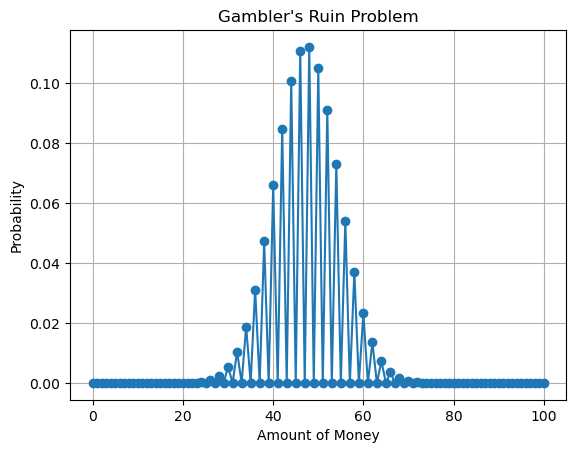

In [14]:
# Parameters
target_amount = 100  # The target amount to reach
initial_money = 50  # The initial amount of money the gambler has
win_probability = 0.474  # The probability of winning in each round

# Quick google search gives you the best odds in vagas as
#Blackjack 42.2% 
# roulette - Black/Red 47.4%


# Simulate the Gambler's Ruin problem
prob_vector, num_steps = gambler_ruin(target_amount, initial_money, win_probability)

# Print the results
print("Probability of reaching $0:", prob_vector[0])
print(f"Probability of reaching ${target_amount}:", prob_vector[target_amount])
print("Number of steps taken:", num_steps)

# Plot the probabilities
plt.plot(np.arange(target_amount + 1), prob_vector, marker='o')
plt.xlabel('Amount of Money')
plt.ylabel('Probability')
plt.title('Gambler\'s Ruin Problem')
plt.grid(True)
plt.show()

# Example 4: Text prediction